In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :] #skip row zero
    df.columns = ['values']
    df['values'] = df['values'].str.replace('<1', '0').astype(int)
    return df

In [3]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'game-of-thrones', 'country_code': 'us'},
    {'trend_name': 'pokemon', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},   
]

In [4]:
#use ** to pass dictionaries as arguments into functions
trend_dfs = [load_trend(**trend) for trend in trends]

In [5]:
# np.random.shuffle(trend_dfs)

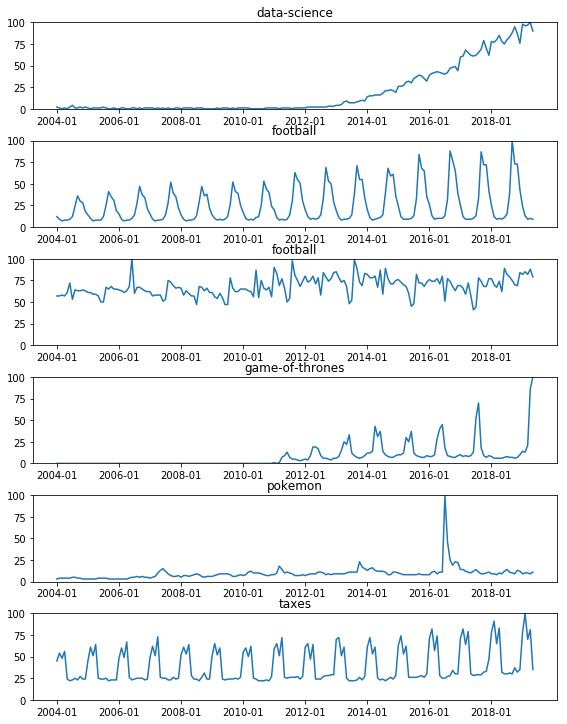

In [6]:
fig, axs =plt.subplots(len(trend_dfs), 1, figsize = (8, 10))
plt.tight_layout()
for i, trend_df in enumerate(trend_dfs):
    ax = axs[i]
    ax.set_title(trends[i]['trend_name'])
    ax.plot(trend_df.index, trend_df['values'])
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
    ax.set_xticks([tick for tick in ticks if tick%24 ==0])

Suppose we want to make prediction like y[i] = t[i] (trend) + s[i] (season) + r[i] (residual)

In [7]:
taxes_df = trend_dfs[-1]

In [8]:
taxes_df['i'] = np.arange(len(taxes_df))
taxes_df['month'] = taxes_df['i'] % 12

In [9]:
taxes_df.tail()

,values,i,month
2019-01,78,180,0
2019-02,100,181,1
2019-03,70,182,2
2019-04,81,183,3
2019-05,35,184,4


Let's try fitting a linear regression model on i (counted index) vs values

In [10]:
import sklearn
from sklearn.linear_model import LinearRegression

This would be a good time to one-hot encode months

In [15]:
from sklearn.preprocessing import OneHotEncoder
month_encoder = OneHotEncoder(categories = 'auto')
month_encoder.fit(taxes_df[['month']])

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [17]:
month_data = month_encoder.transform(taxes_df[['month']]).toarray()

In [ ]:
lr = LinearRegression()
data = np.hstack((taxes_df[['i']].values, month_data))
lr.fit(data, taxes_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

In [28]:
lr = LinearRegression()
data = np.hstack((taxes_df[['i']].values, month_data))
lr.fit(data, taxes_df[['values']])
month_pred = lr.predict(data)

In [27]:
lr = LinearRegression()
trend_model.fit(taxes_df[['i']], taxes_df['values'])
trend_line = trend_model.predict(taxes_df[['i']])

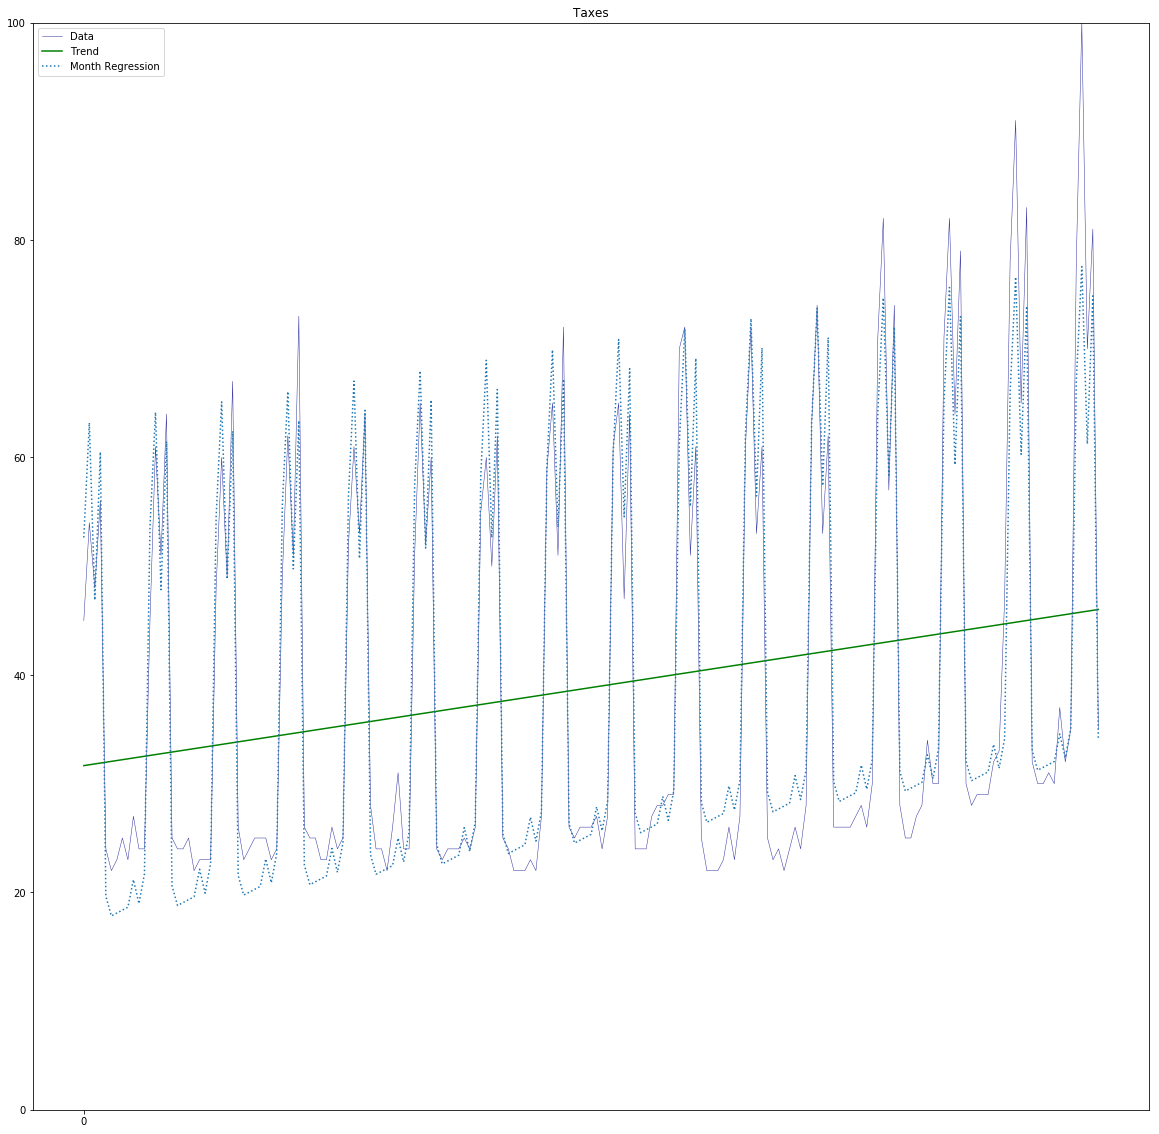

In [32]:
trend_df = taxes_df
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Taxes')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8, color = "darkblue")
ax.plot(trend_df['i'], trend_line, label='Trend', color = "g")
ax.plot(trend_df['i'], month_pred, label='Month Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

As a takeaway, make sure to one-hot-encode months if you want your linear regression model to make any sense.